In [289]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from time import time
import datetime

data = pd.read_csv("new.csv")
data.head(5)

,Unnamed: 0,idx,type,first,second,third,fourth,posts,IE,NS,TF,JP,digitype
0,0,0,ENFP,E,N,F,P,like kind find love easily natural fit next r...,1,-1,-1,1,"[1, 0, 0, 1]"
1,1,1,INFJ,I,N,F,J,oh right really talk like sound pretty stupid...,-1,-1,-1,-1,"[0, 0, 0, 0]"
2,2,2,INFP,I,N,F,P,yep yep yep especially last one yep agree yep ...,-1,-1,-1,1,"[0, 0, 0, 1]"
3,3,3,INFJ,I,N,F,J,things generalizable entire population world s...,-1,-1,-1,-1,"[0, 0, 0, 0]"
4,4,4,INTJ,I,N,T,J,work student hobbies study game read dvds anim...,-1,-1,1,-1,"[0, 0, 1, 0]"


In [290]:
data.posts[0]

'like kind  find love easily natural fit next relax enjoy time feel like things hold hand social find happen may something seriously upset lay hint glaze top actully pretty normal hint truly curious well  know place though still love appear feel wonder possibility find vary depend moods genreally beleive take two make good lead little let lead little best way find understand fairly resilient mean honestly tough much crap personally care do love always keep try even though make  love dream cant stand people tell stop live like everything work find one person read easily understand think oddly fact make love always say mysterious end push happen deve lop say wall already ruin best love ever become afraid let past wall seriously dont recomend least favorite always feel like hididng something wouldnt say display anger genrally stay internalize deeply hurt someone love feel defensless cant protect self actully go egg yellowish inside hope nothings still disappoint yes find hurt badly give p

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


def split(df, size):    
    # Cleaning The Data
    df.posts, df.posts
    
    df.posts = df.posts.fillna(' ')
    #Splitting into train & test
    print("Splitting into train & test")
    train_data,test_data=train_test_split(df,test_size=size,random_state=0,stratify=df.type)
    
    #Applying Tfidf Vectorization
    print("Applying Tfidf Vectorization")
    #vectorizer=CountVectorizer(max_features=50,stop_words='english')
    vectorizer=TfidfVectorizer(max_features=500,stop_words='english')
    vectorizer.fit(train_data.posts)
    
    #Applying the vectorizer transform
    train_post=vectorizer.transform(train_data.posts).toarray()
    test_post=vectorizer.transform(test_data.posts).toarray()
    
    #Label Encoding the classes as 0,1,2,3......
    print("Label Encoding the classes")
    target_encoder= LabelEncoder()
    
    #Getting the final train and test
    print("Getting the final train and test")
    train_target=target_encoder.fit_transform(train_data.type)
    test_target=target_encoder.fit_transform(test_data.type)

    

    train_target_IE =train_data.IE
    test_target_IE = test_data.IE

    train_target_NS =train_data.NS
    test_target_NS = test_data.NS

    train_target_TF =train_data.TF
    test_target_TF = test_data.TF

    train_target_JP =train_data.JP
    test_target_JP = test_data.JP

    print(target_encoder.classes_)
    
    return train_post, test_post, train_target, test_target ,train_target_IE,test_target_IE, train_target_NS,test_target_NS ,train_target_TF, test_target_TF,train_target_JP,test_target_JP

In [292]:
train_X, test_X, train_Y, test_Y, train_IE, test_IE, train_NS, test_NS, train_TF, test_TF, train_JP, test_JP = split(data, 0.3)

Splitting into train & test
Applying Tfidf Vectorization
Label Encoding the classes
Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [293]:
data_checker = pd.DataFrame(train_X)
data_checker.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.8,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,80%,99%,max
0,4858.0,0.015477,0.032324,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.037548,0.138208,0.304468
1,4858.0,0.011356,0.032719,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.148000,0.528875
2,4858.0,0.010163,0.030533,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.136610,0.462956
3,4858.0,0.014791,0.035364,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035281,0.149350,0.688156
4,4858.0,0.009904,0.031087,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.141667,0.642566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4858.0,0.020399,0.040087,0.0,0.0,0.0,0.0,0.0,0.000000,0.035045,0.041081,0.179157,0.353458
496,4858.0,0.029701,0.048151,0.0,0.0,0.0,0.0,0.0,0.000000,0.045280,0.059113,0.215031,0.813613
497,4858.0,0.035756,0.051302,0.0,0.0,0.0,0.0,0.0,0.016592,0.056377,0.067249,0.229478,0.494350
498,4858.0,0.008610,0.027408,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.130833,0.276939


### Kernel SVM

- linear: $K(x,y) = x^Ty$
- poly: $K(x,y) = (\gamma (x^Ty)+r)^d$
- sigmoid: $K(x,y) = tanh((x^Ty)+r)$
- rbf : $K(x,y) = e^{-\gamma ||x-y||^2}, \gamma>0$

In [294]:
kernels = ["linear","poly","rbf","sigmoid"]

In [295]:
gamma = 'scale'
degree = 3
r = 0.0

#### All attribute

In [296]:
# ie_accuracy=[]
scores_test = []
scores_train = []
times = []

report = pd.DataFrame(columns=['Models','Train accuracy', 'Train time','Test accuracy'])  
report['Models'] = kernels

for kernel in kernels:

    time0 = time()
    clf = SVC(kernel = kernel, gamma=gamma, degree = degree, coef0 = r, cache_size=50000).fit(train_X, train_Y)
    
    train_score = clf.score(train_X,train_Y)
    scores_train.append( train_score.copy() )

    test_score = clf.score(test_X,test_Y)
    scores_test.append(test_score.copy() )
    
    times.append(time()-time0)
    #ie_report[kernel] = clf.classification_report(y_test,model_log.predict(X_test),zero_division=0)

In [297]:
report['Train accuracy'] = scores_train
report['Train time'] = times
report['Test accuracy'] = scores_test
report.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues', subset=['Test accuracy']).background_gradient(cmap='Blues', subset=['Train time']).background_gradient(cmap='Blues', subset=['Train accuracy'])

,Models,Train accuracy,Train time,Test accuracy
0,rbf,0.734047,30.857661,0.317003
1,poly,0.987855,35.146751,0.316042
2,linear,0.475504,25.300210,0.310279
3,sigmoid,0.365377,25.245560,0.306916


#### IE

In [298]:

# ie_accuracy=[]
ie_scores_test = []
ie_scores_train = []
ie_times = []

ie_report = pd.DataFrame(columns=['Models','Train accuracy', 'Train time','Test accuracy'])  
ie_report['Models'] = kernels

for kernel in kernels:

    time0 = time()
    clf = SVC(C = 1., kernel = kernel, gamma=gamma, degree = degree, coef0 = r, cache_size=50000).fit(train_X, train_IE)
    
    train_score = clf.score(train_X,train_IE)
    ie_scores_train.append( train_score.copy() )

    test_score = clf.score(test_X,test_IE)
    ie_scores_test.append(test_score.copy() )
    
    ie_times.append(time()-time0)
    #ie_report[kernel] = clf.classification_report(y_test,model_log.predict(X_test),zero_division=0)


In [299]:
ie_report['Train accuracy'] = ie_scores_train
ie_report['Train time'] = ie_times
ie_report['Test accuracy'] = ie_scores_test
ie_report.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues', subset=['Test accuracy']).background_gradient(cmap='Blues', subset=['Train time']).background_gradient(cmap='Blues', subset=['Train accuracy'])

,Models,Train accuracy,Train time,Test accuracy
0,rbf,0.838617,24.255259,0.770893
1,linear,0.770893,16.092506,0.770413
2,sigmoid,0.757102,7.945040,0.770413
3,poly,0.991149,26.795339,0.769933


#### NS

In [300]:
# ie_accuracy=[]
ns_scores_test = []
ns_scores_train = []
ns_times = []

ns_report = pd.DataFrame(columns=['Models','Train accuracy', 'Train time','Test accuracy'])  
ns_report['Models'] = kernels

for kernel in kernels:

    time0 = time()
    clf = SVC(kernel = kernel, gamma=gamma, degree = degree, coef0 = r, cache_size=50000).fit(train_X, train_NS)
    
    train_score = clf.score(train_X,train_NS)
    ns_scores_train.append( train_score.copy() )

    test_score = clf.score(test_X,test_IE)
    ns_scores_test.append(test_score.copy() )
    
    ns_times.append(time()-time0)
    #ie_report[kernel] = clf.classification_report(y_test,model_log.predict(X_test),zero_division=0)

In [301]:
ns_report['Train accuracy'] = ns_scores_train
ns_report['Train time'] = ns_times
ns_report['Test accuracy'] = ns_scores_test
ns_report.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style\
    .background_gradient(cmap='Blues', subset=['Test accuracy'])\
    .background_gradient(cmap='Blues', subset=['Train time'])\
    .background_gradient(cmap='Blues', subset=['Train accuracy'])

,Models,Train accuracy,Train time,Test accuracy
0,linear,0.862907,13.397481,0.770413
1,rbf,0.870111,21.805165,0.770413
2,sigmoid,0.862495,6.643756,0.770413
3,poly,0.998353,23.301729,0.768012


#### JP

In [302]:
# ie_accuracy=[]
jp_scores_test = []
jp_scores_train = []
jp_times = []
jp_report = pd.DataFrame(columns=['Models','Train accuracy', 'Train time','Test accuracy'])  
jp_report['Models'] = kernels

for kernel in kernels:

    time0 = time()
    clf = SVC(kernel = kernel, gamma=gamma, degree = degree, coef0 = r, cache_size=5000).fit(train_X, train_JP)
    
    train_score = clf.score(train_X,train_JP)
    test_score = clf.score(test_X,test_JP)

    jp_scores_test.append(test_score.copy() )
    jp_scores_train.append( train_score.copy() )
    jp_times.append(time()-time0)
    #ie_report[kernel] = clf.classification_report(y_test,model_log.predict(X_test),zero_division=0)

In [303]:
jp_report['Train accuracy'] = jp_scores_train
jp_report['Train time'] = jp_times
jp_report['Test accuracy'] = jp_scores_test
jp_report.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style\
    .background_gradient(cmap='Blues', subset=['Test accuracy'])\
    .background_gradient(cmap='Blues', subset=['Train time'])\
    .background_gradient(cmap='Blues', subset=['Train accuracy'])

,Models,Train accuracy,Train time,Test accuracy
0,poly,0.994236,31.332261,0.645053
1,rbf,0.898312,25.711215,0.645053
2,linear,0.703993,14.384366,0.643132
3,sigmoid,0.611980,15.768533,0.640250


#### TF

In [304]:
# ie_accuracy=[]
tf_scores_test = []
tf_scores_train = []
tf_times = []
tf_report = pd.DataFrame(columns=['Models','Train accuracy', 'Train time','Test accuracy'])  
tf_report['Models'] = kernels

for kernel in kernels:

    time0 = time()
    clf = SVC(kernel = kernel, gamma=gamma, degree = degree, coef0 = r, cache_size=5000).fit(train_X, train_TF)
    
    train_score = clf.score(train_X,train_TF)
    test_score = clf.score(test_X,test_TF)

    tf_scores_test.append(test_score.copy() )
    tf_scores_train.append( train_score.copy() )
    tf_times.append(time()-time0)
    #ie_report[kernel] = clf.classification_report(y_test,model_log.predict(X_test),zero_division=0)

    print(gamma)

scale
scale
scale
scale


In [305]:
tf_report['Train accuracy'] = tf_scores_train
tf_report['Train time'] = tf_times
tf_report['Test accuracy'] = tf_scores_test
tf_report.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style\
    .background_gradient(cmap='Blues', subset=['Test accuracy'])\
    .background_gradient(cmap='Blues', subset=['Train time'])\
    .background_gradient(cmap='Blues', subset=['Train accuracy'])

,Models,Train accuracy,Train time,Test accuracy
0,rbf,0.931247,23.654586,0.710855
1,linear,0.782627,13.486006,0.709414
2,sigmoid,0.695760,16.708707,0.695965
3,poly,0.994648,28.503457,0.695485


#### RBF with different gamma

22.257946491241455
22.0357084274292
21.890308141708374
21.82030725479126
22.031002044677734
22.005131483078003
21.942442417144775
22.32514214515686
21.789611101150513
22.263527870178223
22.834376573562622
22.63285541534424
22.049261331558228
21.903233528137207
22.022679090499878
21.978404998779297
22.76041531562805
22.249367713928223
22.2352774143219
22.153478384017944
21.877261877059937
22.294915914535522
22.903155088424683
22.074758052825928
22.291418313980103
23.96282935142517
22.517507553100586
22.006126165390015
22.520780324935913
21.999374628067017
22.45045495033264
21.617669820785522
21.98861861228943
22.0513756275177
22.122086763381958
22.2442409992218
23.079807996749878
23.38849711418152
22.112950086593628
23.10905361175537
22.741719961166382
22.015697956085205
22.06324601173401
22.611979961395264
21.970533847808838
23.335623741149902
22.67760396003723
22.167036533355713
23.415844678878784
23.582480907440186


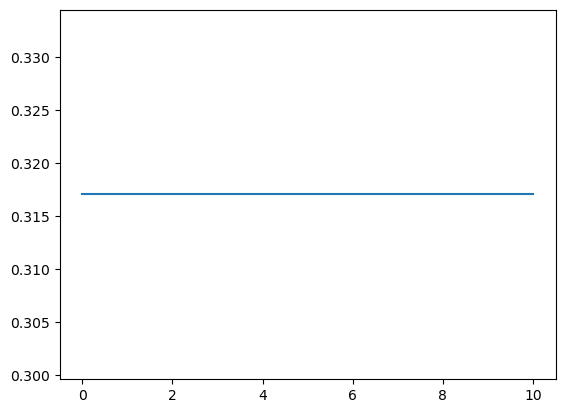

In [306]:
gammas = np.logspace(-10,1,50)
scores = []

for gama in gammas:
    time0 = time()
    clf = SVC(kernel = "rbf", gamma=gamma, degree = degree, coef0 = r, cache_size=15000).fit(train_X, train_Y)

    test_score = clf.score(test_X,test_Y)
    scores.append(test_score)
    
    print(time()-time0)

plt.plot(gammas, scores)
plt.show()


16.14450192451477
16.07914662361145
16.04607605934143
16.827203273773193
21.164660930633545
22.703004121780396
22.825090408325195
21.9398775100708
21.593585729599
19.44389581680298
19.502124309539795
22.875749349594116
22.4713077545166
22.543453216552734
22.214375257492065
22.567297220230103
23.116558074951172
21.828445434570312
22.789082527160645
22.699182748794556
22.64992046356201
22.519333362579346
22.07651972770691
23.518929958343506
22.172467947006226
23.241034984588623
22.94429612159729
22.61218547821045
22.069809198379517
23.720974922180176
21.45215654373169
20.256620407104492
22.058229446411133
24.211042165756226
26.445388317108154
27.26710820198059
25.474354028701782
24.00800132751465
21.761335372924805
22.58389186859131
23.936952114105225
27.80951189994812
27.622618198394775
24.639941453933716
22.30537176132202
22.793232679367065
22.130834341049194
23.196967601776123
23.538785696029663
22.774926900863647


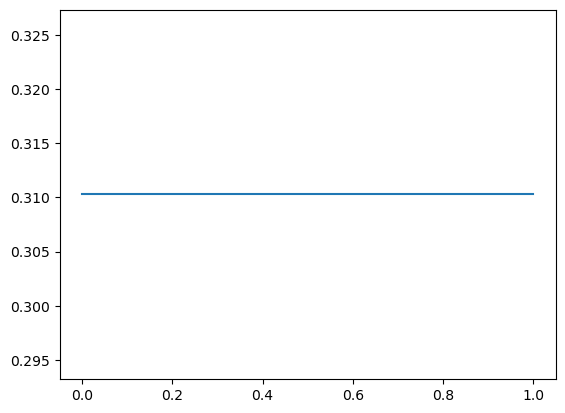

In [325]:
Cs = np.logspace(-10,0,50)
c_scores = []

for c in Cs:
    time0 = time()
    clf = SVC(kernel = "linear", gamma=gamma, degree = degree, coef0 = c, cache_size=15000).fit(train_X, train_Y)

    test_score = clf.score(test_X,test_Y)
    c_scores.append(test_score)
    
    print(time()-time0)

plt.plot(Cs, c_scores)
plt.show()

In [324]:
 gammas

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

20.905258417129517
18.86421489715576
19.271451234817505
19.554508209228516
25.372161388397217
24.6451313495636
25.122808694839478
25.03296947479248
19.15739917755127
24.931041717529297
23.379488706588745
25.906546592712402
25.213417768478394
25.310455322265625
25.32752799987793
25.488157272338867
25.41157102584839
24.378883838653564
27.786969423294067
27.597960233688354
27.222721338272095
27.09017014503479
26.886893272399902
26.99935746192932
24.39505672454834
27.05996322631836
27.30965781211853
26.3562114238739
27.199347019195557
25.203554153442383
26.252995252609253
25.57719349861145
28.251681089401245
26.950953006744385
26.62054967880249
26.793819427490234
26.9047634601593
26.661374807357788
26.20849323272705
27.481576681137085
22.111907958984375
19.39442801475525
22.747753858566284
24.98788547515869
25.856356859207153
24.31985378265381
23.530560731887817
26.54356813430786
24.89566683769226
25.267730712890625


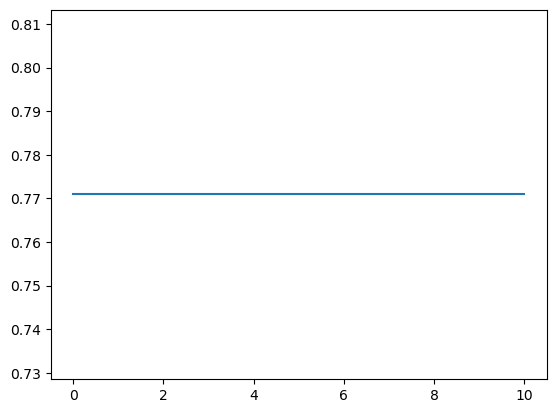

In [307]:
IE_scores = []

for gama in gammas:
    time0 = time()
    clf = SVC(kernel = "rbf", gamma=gamma, degree = degree, coef0 = r, cache_size=50000).fit(train_X, train_IE)

    test_score = clf.score(test_X,test_IE)
    IE_scores.append(test_score)
    
    print(time()-time0)

plt.plot(gammas, IE_scores)
plt.show()

## Poor performence

### Imbalanced Data

In [308]:
data.type.value_counts()


type
INFP    1475
INFJ    1191
INTP    1027
INTJ     877
ENFP     549
ENTP     536
ISTP     267
ISFP     212
ENTJ     184
ISTJ     165
ENFJ     149
ISFJ     135
ESTP      72
ESFP      40
ESTJ      31
ESFJ      30
Name: count, dtype: int64

In [309]:
print(data.IE.value_counts())
print(data.NS.value_counts())
print(data.TF.value_counts())
print(data.JP.value_counts())

IE
-1    5349
 1    1591
Name: count, dtype: int64
NS
-1    5988
 1     952
Name: count, dtype: int64
TF
-1    3781
 1    3159
Name: count, dtype: int64
JP
 1    4178
-1    2762
Name: count, dtype: int64


### Visualization

In [310]:
post_checker = pd.DataFrame(train_X)
post_checker.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.8,0.99]).T

train_Y

array([ 1, 11, 11, ...,  9, 10,  1])

#### PCA

In [311]:
from sklearn.decomposition import PCA


In [312]:
pca = PCA(n_components=10)
pca = pca.fit(train_X)
X_dr = pca.transform(train_X)


In [313]:
train_JP

1789    1
614     1
3986    1
4000    1
6747    1
       ..
4407    1
3499    1
6347    1
706    -1
207     1
Name: JP, Length: 4858, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


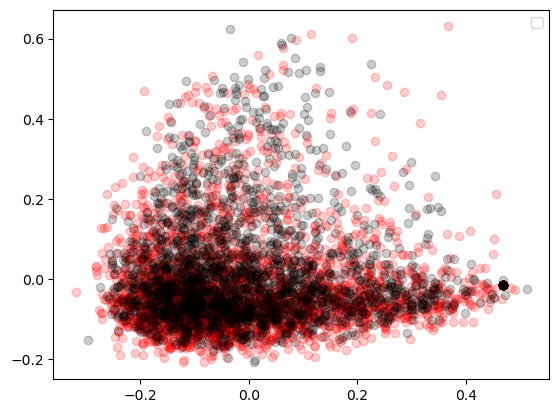

In [314]:
plt.figure()

colors = ['red','black']
m_class = [0,1]


plt.scatter(X_dr[ train_TF==-1,0]
                ,X_dr[ train_TF==-1,1]
                , alpha=0.2
                ,c='red'
                )
plt.scatter(X_dr[ train_TF==1,0]
                ,X_dr[ train_TF==1,1]
                , alpha=0.2
                ,c='black'
                )
    
plt.legend()
plt.show()

In [315]:
pca.explained_variance_

array([0.02622997, 0.01686464, 0.00838974, 0.00746963, 0.007253  ,
       0.00692059, 0.00669512, 0.00635854, 0.00556038, 0.00549278])

In [316]:
pca.explained_variance_ratio_

array([0.03508802, 0.02255995, 0.01122302, 0.00999218, 0.00970239,
       0.00925773, 0.00895611, 0.00850587, 0.00743817, 0.00734773])

In [317]:
pca_line = PCA().fit(train_X)
pca_line.explained_variance_ratio_

array([0.03508802, 0.02255995, 0.0112231 , 0.00999282, 0.00970253,
       0.00925935, 0.00895925, 0.00850827, 0.00744612, 0.00735831,
       0.0070144 , 0.00665707, 0.00656938, 0.00640216, 0.0061387 ,
       0.00598385, 0.00538647, 0.00523273, 0.00515637, 0.00507442,
       0.00492574, 0.00476577, 0.00467802, 0.00463827, 0.00457994,
       0.00441778, 0.00437977, 0.00429529, 0.00414519, 0.00404604,
       0.00403258, 0.00396652, 0.00393696, 0.00389038, 0.00385569,
       0.0038481 , 0.00379732, 0.00375385, 0.00373506, 0.00367353,
       0.00365118, 0.0035571 , 0.00352048, 0.00350991, 0.0034817 ,
       0.00345634, 0.00336199, 0.00334187, 0.00329366, 0.00328515,
       0.0032706 , 0.00323529, 0.00318592, 0.00317031, 0.00316674,
       0.00314114, 0.00311088, 0.00308582, 0.00306731, 0.00305839,
       0.00302292, 0.00301156, 0.0030001 , 0.00298525, 0.00296498,
       0.00293721, 0.00291954, 0.00290814, 0.00287683, 0.00286129,
       0.00285056, 0.00284712, 0.00282413, 0.00278892, 0.00278

In [318]:
np.cumsum(pca_line.explained_variance_ratio_)

array([0.03508802, 0.05764797, 0.06887106, 0.07886388, 0.08856641,
       0.09782576, 0.10678501, 0.11529328, 0.1227394 , 0.13009771,
       0.13711211, 0.14376918, 0.15033856, 0.15674072, 0.16287941,
       0.16886327, 0.17424974, 0.17948247, 0.18463884, 0.18971326,
       0.194639  , 0.19940477, 0.20408279, 0.20872106, 0.213301  ,
       0.21771878, 0.22209855, 0.22639384, 0.23053903, 0.23458507,
       0.23861765, 0.24258418, 0.24652114, 0.25041152, 0.25426721,
       0.25811531, 0.26191263, 0.26566648, 0.26940155, 0.27307508,
       0.27672625, 0.28028336, 0.28380384, 0.28731374, 0.29079544,
       0.29425178, 0.29761377, 0.30095564, 0.30424931, 0.30753446,
       0.31080506, 0.31404035, 0.31722627, 0.32039658, 0.32356332,
       0.32670446, 0.32981534, 0.33290116, 0.33596847, 0.33902687,
       0.34204979, 0.34506135, 0.34806145, 0.3510467 , 0.35401168,
       0.35694889, 0.35986843, 0.36277657, 0.3656534 , 0.36851469,
       0.37136525, 0.37421237, 0.3770365 , 0.37982542, 0.38260

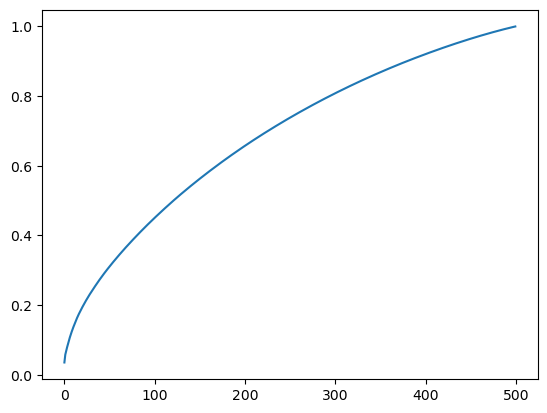

In [319]:
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.show()

#### std 

In [320]:
data_checker = pd.DataFrame(train_X)
data_checker.describe().T

,count,mean,std,min,25%,50%,75%,max
0,4858.0,0.015477,0.032324,0.0,0.0,0.000000,0.000000,0.304468
1,4858.0,0.011356,0.032719,0.0,0.0,0.000000,0.000000,0.528875
2,4858.0,0.010163,0.030533,0.0,0.0,0.000000,0.000000,0.462956
3,4858.0,0.014791,0.035364,0.0,0.0,0.000000,0.000000,0.688156
4,4858.0,0.009904,0.031087,0.0,0.0,0.000000,0.000000,0.642566
...,...,...,...,...,...,...,...,...
495,4858.0,0.020399,0.040087,0.0,0.0,0.000000,0.035045,0.353458
496,4858.0,0.029701,0.048151,0.0,0.0,0.000000,0.045280,0.813613
497,4858.0,0.035756,0.051302,0.0,0.0,0.016592,0.056377,0.494350
498,4858.0,0.008610,0.027408,0.0,0.0,0.000000,0.000000,0.276939


In [321]:
train_X[:,12][:].shape

(4858,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


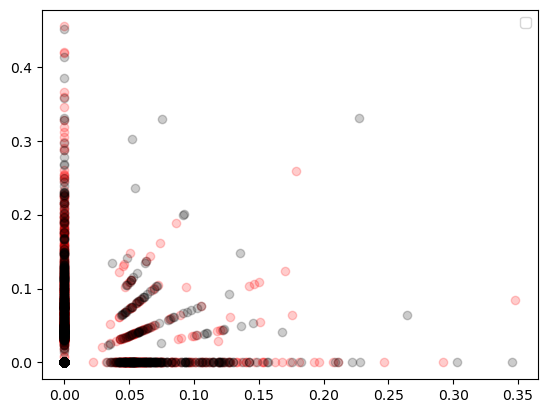

In [322]:
plt.figure()

colors = ['red','black']
m_class = [0,1]


plt.scatter(train_X[:,12][ train_TF==-1]
                ,train_X[:,42][ train_TF==-1]
                , alpha=0.2
                ,c='red'
                )
plt.scatter(train_X[:,12][ train_TF==1]
                ,train_X[:,42][ train_TF==1]
                , alpha=0.2
                ,c='black'
                )
    
plt.legend()
plt.show()

##### presentation


In [323]:
train_X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33307744, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     